In [2]:
import pandas as pd
import geopandas as gpd

iod = pd.read_csv(r'D:\File_7_-_All_IoD2019_Scores__Ranks__Deciles_and_Population_Denominators.csv')
#get rid of all the spaces in the column names
iod.columns = [c.replace(' ', '_') for c in iod.columns]
#remove all the brackets
iod.columns = [c.replace('(', '') for c in iod.columns]
iod.columns = [c.replace(')', '') for c in iod.columns]
iod.info()
iod.sample(20)

C:\Users\Adam\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 57 columns):
LSOA_code_2011                                                                                      32844 non-null object
LSOA_name_2011                                                                                      32844 non-null object
Local_Authority_District_code_2019                                                                  32844 non-null object
Local_Authority_District_name_2019                                                                  32844 non-null object
Index_of_Multiple_Deprivation_IMD_Score                                                             32844 non-null float64
Index_of_Multiple_Deprivation_IMD_Rank_where_1_is_most_deprived                                     32844 non-null object
Index_of_Multiple_Deprivation_IMD_Decile_where_1_is_most_deprived_10%_of_LSOAs                      32844 non-null int64
Income_Score_rate                    

,LSOA_code_2011,LSOA_name_2011,Local_Authority_District_code_2019,Local_Authority_District_name_2019,Index_of_Multiple_Deprivation_IMD_Score,Index_of_Multiple_Deprivation_IMD_Rank_where_1_is_most_deprived,Index_of_Multiple_Deprivation_IMD_Decile_where_1_is_most_deprived_10%_of_LSOAs,Income_Score_rate,Income_Rank_where_1_is_most_deprived,Income_Decile_where_1_is_most_deprived_10%_of_LSOAs,...,Indoors_Sub-domain_Rank_where_1_is_most_deprived,Indoors_Sub-domain_Decile_where_1_is_most_deprived_10%_of_LSOAs,Outdoors_Sub-domain_Score,Outdoors_Sub-domain_Rank_where_1_is_most_deprived,Outdoors_Sub-domain_Decile_where_1_is_most_deprived_10%_of_LSOAs,Total_population:_mid_2015_excluding_prisoners,Dependent_Children_aged_0-15:_mid_2015_excluding_prisoners,Population_aged_16-59:_mid_2015_excluding_prisoners,Older_population_aged_60_and_over:_mid_2015_excluding_prisoners,Working_age_population_18-59/64:_for_use_with_Employment_Deprivation_Domain_excluding_prisoners_
7671,E01007874,Sheffield 022A,E08000019,Sheffield,51.432,"1,964",1,0.367,751,1,...,"26,208",8,0.519,"8,211",3,"2,146",736,"1,130",280,"1,078"
12325,E01012718,Blackpool 003E,E06000009,Blackpool,13.638,"20,325",7,0.069,"21,809",7,...,"13,922",5,-0.268,"19,764",7,"1,646",221,724,701,751
2660,E01002722,Islington 018A,E09000019,Islington,36.798,"5,269",2,0.242,"4,390",2,...,"17,578",6,1.907,565,1,"1,458",216,"1,017",225,"1,015"
29335,E01030108,St Edmundsbury 014D,E07000245,West Suffolk,28.048,"9,007",3,0.114,"14,386",5,...,"24,068",8,-0.847,"27,948",9,"1,948",413,"1,143",392,"1,130"
9740,E01010041,Sandwell 029C,E08000028,Sandwell,41.608,"3,839",2,0.254,"3,826",2,...,"9,348",3,0.636,"7,080",3,"1,740",371,964,405,969
24382,E01025042,Hyndburn 006B,E07000120,Hyndburn,58.910,"1,021",1,0.344,"1,127",1,...,163,1,0.943,"4,559",2,"2,153",753,"1,185",215,"1,150"
29188,E01029955,Forest Heath 006D,E07000245,West Suffolk,13.572,"20,407",7,0.066,"22,271",7,...,"21,245",7,-0.159,"17,973",6,"1,873",316,"1,116",441,"1,133"
7069,E01007262,Wirral 028C,E08000015,Wirral,4.956,"30,547",10,0.030,"30,858",10,...,"15,353",5,-0.761,"26,947",9,"1,493",235,725,533,741
3521,E01003598,Newham 021A,E09000025,Newham,31.237,"7,435",3,0.234,"4,787",2,...,"20,974",7,1.010,"4,058",2,"2,034",526,"1,319",189,"1,295"
29776,E01030559,Reigate and Banstead 002A,E07000211,Reigate and Banstead,5.887,"29,587",10,0.042,"28,070",9,...,"28,947",9,0.502,"8,400",3,"1,316",202,582,532,593


In [22]:
craven = iod.loc[iod['Local_Authority_District_code_2019']=='E07000163']
craven = craven[['LSOA_code_2011','Crime_Rank_where_1_is_most_deprived']]
craven.info()
craven.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 26843 to 26874
Data columns (total 2 columns):
LSOA_code_2011                         32 non-null object
Crime_Rank_where_1_is_most_deprived    32 non-null object
dtypes: object(2)
memory usage: 768.0+ bytes


,LSOA_code_2011,Crime_Rank_where_1_is_most_deprived
26843,E01027555,"31,468"
26844,E01027556,"29,419"
26845,E01027557,"31,475"
26846,E01027558,"26,128"
26847,E01027559,"30,583"
26848,E01027560,"29,427"
26849,E01027561,"31,262"
26850,E01027562,"28,422"
26851,E01027563,"30,439"
26852,E01027564,"25,713"


In [4]:
from osgeo import gdal, ogr, osr
from fiona.ogrext import Iterator, ItemsIterator, KeysIterator
from geopandas import GeoDataFrame
gdal.VersionInfo()

'2030300'

In [5]:
import matplotlib.pyplot as plt
#this should read the geojson as per this tutorial https://medium.com/@h4k1m0u/plot-a-geojson-map-using-geopandas-be89e7a0b93b
#this is for the local authority area.
gdf = gpd.read_file('https://opendata.arcgis.com/datasets/bbb0e58b0be64cc1a1460aa69e33678f_0.geojson')
gdf.head()

,objectid,lad19cd,lad19nm,lad19nmw,bng_e,bng_n,long,lat,st_areashape,st_lengthshape,geometry
0,1,E06000001,Hartlepool,,447157,531476,-1.27023,54.676201,9.651231e+07,50488.387081,"POLYGON ((-1.17763 54.69919, -1.24284 54.72226..."
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.544701,5.522915e+07,35506.404054,"POLYGON ((-1.28263 54.56528, -1.27061 54.55602..."
2,3,E06000003,Redcar and Cleveland,,464359,519597,-1.00611,54.567501,2.484090e+08,79150.715938,"POLYGON ((-1.14913 54.61433, -1.16025 54.60454..."
3,4,E06000004,Stockton-on-Tees,,444937,518183,-1.30669,54.556900,2.052315e+08,87566.678920,"POLYGON ((-1.28263 54.56528, -1.26256 54.57029..."
4,5,E06000005,Darlington,,428029,515648,-1.56835,54.535301,1.988128e+08,91926.839545,"POLYGON ((-1.69693 54.53601, -1.65794 54.53459..."


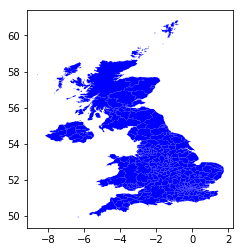

In [6]:
#this should plot the shape data from the geodataframe
testplot = gdf.plot(color='blue')

In [7]:
#this is for the LSOA 
lsoa_gdf = gpd.read_file('https://opendata.arcgis.com/datasets/da831f80764346889837c72508f046fa_3.geojson')
lsoa_gdf.head()

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry
0,1,E01013150,North East Lincolnshire 013B,North East Lincolnshire 013B,2.842166e+05,2286.649368,"POLYGON ((-0.13613 53.55644, -0.13298 53.56005..."
1,2,E01015580,Swindon 007D,Swindon 007D,4.534211e+05,3426.828755,"POLYGON ((-1.78573 51.57653, -1.78735 51.58018..."
2,3,E01023601,North Hertfordshire 010A,North Hertfordshire 010A,2.801437e+05,2228.370570,"POLYGON ((-0.27428 51.94900, -0.26525 51.95320..."
3,4,E01024217,Dover 005B,Dover 005B,7.351294e+06,13012.376562,"POLYGON ((1.40258 51.23871, 1.39393 51.25655, ..."
4,5,E01000722,Bromley 023A,Bromley 023A,5.691620e+05,3524.308527,"POLYGON ((0.11461 51.39255, 0.11185 51.39465, ..."


In [16]:
#truncate it down using a contains wild card type argument
cravengdf = lsoa_gdf[['Craven' in x for x in lsoa_gdf['lsoa11nm']]]
cravengdf.info()
cravengdf.head(32)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 32 entries, 976 to 33754
Data columns (total 7 columns):
objectid          32 non-null int64
lsoa11cd          32 non-null object
lsoa11nm          32 non-null object
lsoa11nmw         32 non-null object
st_areashape      32 non-null float64
st_lengthshape    32 non-null float64
geometry          32 non-null geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 2.0+ KB


,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry
976,977,E01027555,Craven 008A,Craven 008A,1.297684e+07,19399.701436,"POLYGON ((-1.96505 53.94823, -1.98425 53.95043..."
984,985,E01027557,Craven 004A,Craven 004A,1.588047e+08,95399.166817,"POLYGON ((-1.86711 54.09769, -1.89100 54.10442..."
4057,4058,E01027571,Craven 003B,Craven 003B,1.020976e+08,66947.908666,"POLYGON ((-2.24937 54.14064, -2.24951 54.14069..."
4065,4066,E01027570,Craven 001D,Craven 001D,1.011953e+08,57998.779646,"POLYGON ((-2.28641 54.24050, -2.29276 54.25262..."
4870,4871,E01027567,Craven 002B,Craven 002B,4.836950e+07,39280.642558,"POLYGON ((-1.90309 54.11965, -1.90562 54.12247..."
4882,4883,E01027559,Craven 001B,Craven 001B,2.353149e+06,9687.004888,"POLYGON ((-2.52105 54.12269, -2.52451 54.11744..."
7355,7356,E01027579,Craven 005D,Craven 005D,4.407279e+05,2940.804852,"POLYGON ((-2.00275 53.95716, -2.00854 53.96018..."
7362,7363,E01027578,Craven 006A,Craven 006A,1.585193e+05,1879.022448,"POLYGON ((-2.01217 53.95950, -2.01782 53.95978..."
7727,7728,E01027586,Craven 007D,Craven 007D,4.781307e+07,36769.625697,"POLYGON ((-2.04944 53.95658, -2.06114 53.95923..."
8147,8148,E01027569,Craven 001C,Craven 001C,1.028364e+08,43977.455704,"POLYGON ((-2.37407 54.04909, -2.36507 54.06120..."


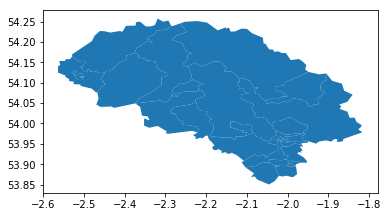

In [17]:
cravengdf.plot()

In [23]:
merged = cravengdf.merge(craven, left_on = 'lsoa11cd', right_on = 'LSOA_code_2011')
merged.head()

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry,LSOA_code_2011,Crime_Rank_where_1_is_most_deprived
0,977,E01027555,Craven 008A,Craven 008A,1.297684e+07,19399.701436,"POLYGON ((-1.96505 53.94823, -1.98425 53.95043...",E01027555,"31,468"
1,985,E01027557,Craven 004A,Craven 004A,1.588047e+08,95399.166817,"POLYGON ((-1.86711 54.09769, -1.89100 54.10442...",E01027557,"31,475"
2,4058,E01027571,Craven 003B,Craven 003B,1.020976e+08,66947.908666,"POLYGON ((-2.24937 54.14064, -2.24951 54.14069...",E01027571,"32,298"
3,4066,E01027570,Craven 001D,Craven 001D,1.011953e+08,57998.779646,"POLYGON ((-2.28641 54.24050, -2.29276 54.25262...",E01027570,"30,314"
4,4871,E01027567,Craven 002B,Craven 002B,4.836950e+07,39280.642558,"POLYGON ((-1.90309 54.11965, -1.90562 54.12247...",E01027567,"32,428"


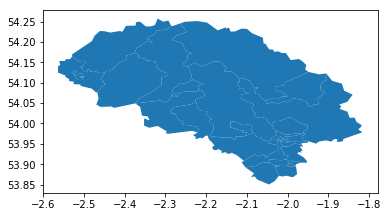

In [24]:
merged.plot()

https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0
Might have a go with this tutorial first